Imports and function definitions

In [2]:
import os
from glob import glob
from natsort import natsorted
from nimlab import connectomics as cs
from nimlab.connectomics import ConnectomeSubject
from nimlab.jax_functions import load_image, NiftiMasker
import numpy as np
from tqdm import tqdm

if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('..')

def create_connectome_subjects(cs_roi, cs_brain, roi_list, masker_list, roi_connectome_type, brain_connectome_type, same_connectome, warning_flag):
    # Load paths to all ROI connectome files
    roi_connectome_files_norms = natsorted(glob(os.path.join(cs_roi, "*_norms.npy")))
    roi_connectome_files = [
        (glob(f.split("_norms")[0] + ".npy")[0], f) for f in roi_connectome_files_norms
    ]

    # Load paths to all Brain connectome files
    brain_connectome_files_norms = natsorted(glob(os.path.join(cs_brain, "*_norms.npy")))
    brain_connectome_files = [
        (glob(f.split("_norms")[0] + ".npy")[0], f)
        for f in brain_connectome_files_norms
    ]

    # Create ConnectomeSubject objects
    subjects = []
    for roi_connectome_file, brain_connectome_file in zip(roi_connectome_files, brain_connectome_files):
        subject = ConnectomeSubject(
            roi_connectome_file,
            brain_connectome_file,
            roi_list,
            roi_connectome_type,
            brain_connectome_type,
            same_connectome,
            warning_flag
        )
        subjects.append(subject)
    
    return subjects


Save BOLD signal in the brain ROI as numpy arrays (probably won't be very useful, but just in case)

In [16]:
cs_roi = '/data/nimlab/connectome_npy/GSP1000_MF'
cs_brain = '/data/nimlab/connectome_npy/GSP1000_MF'
masker_list = [] 
roi_connectome_type = 'volume'
brain_connectome_type = 'volume'
same_connectome = False
warning_flag = True
roi_list = {
    1:np.atleast_2d(NiftiMasker().transform('/PHShome/jt041/projects/connectome_differences/rois/1-r_01_gsp1000MF_vs_yeo1000_csf_brainstem_roi.nii.gz')),
    2:np.atleast_2d(NiftiMasker().transform('/PHShome/jt041/projects/connectome_differences/rois/1-r_01_gsp1000MF_vs_yeo1000_masked_brainstem_roi.nii.gz')),
    3:np.atleast_2d(NiftiMasker().transform('/PHShome/jt041/projects/connectome_differences/rois/1-r_01_gsp1000MF_vs_yeo1000_dil_brainstem_roi.nii.gz')),
} 

subjects = create_connectome_subjects(cs_roi, cs_brain, roi_list, masker_list, roi_connectome_type, brain_connectome_type, same_connectome, warning_flag)

if not os.path.exists('bold_signal/GSP1000_MF_bold_brainstem_masked_240.npy'):

    results_120 = []
    results_240 = []
    for i, sub in enumerate(tqdm(subjects, desc="Processing subjects")):
        result = cs.extract_avg_signal(
            connectome_mat=np.load(sub.brain_connectome_file),
            roi_mat=np.atleast_2d(NiftiMasker().transform('/PHShome/jt041/projects/connectome_differences/rois/1-r_01_gsp1000MF_vs_yeo1000_masked_brainstem_roi.nii.gz')),
        )
        if result.shape == (240,):
            results_240.append(result)
        if result.shape == (120,):
            results_120.append(result)

    results_240 = np.array(results_240)
    results_120 = np.array(results_120)

    np.save('bold_signal/GSP1000_MF_bold_brainstem_masked_240.npy', results_240)
    np.save('bold_signal/GSP1000_MF_bold_brainstem_masked_120.npy', results_120)




Create a correlation matrix with ROIs and some csf masks for GSP1000_MF

In [4]:
cs_roi_gsp1000mf = '/data/nimlab/connectome_npy/GSP1000_MF'
cs_brain_gsp1000mf = '/data/nimlab/connectome_npy/GSP1000_MF'
masker_list = [] 
roi_connectome_type = 'volume'
brain_connectome_type = 'volume'
same_connectome = False
warning_flag = True


roi_list = {
    'posterior_csf':np.atleast_2d(NiftiMasker().transform('/PHShome/jt041/projects/connectome_differences/masks/posterior_csf_mask_2mm.nii.gz')),
    'lateral_ventrical_csf':np.atleast_2d(NiftiMasker().transform('/PHShome/jt041/projects/connectome_differences/masks/lateral_ventricular_csf_mask_2mm.nii.gz')),
    'inferomedial_csf':np.atleast_2d(NiftiMasker().transform('/PHShome/jt041/projects/connectome_differences/masks/inferomedial_csf_mask_2mm.nii.gz')),
    'brainstem_csf':np.atleast_2d(NiftiMasker().transform('/PHShome/jt041/projects/connectome_differences/masks/brainstem_csf_mask_2mm.nii.gz')),
    'overall_csf':np.atleast_2d(NiftiMasker().transform('/PHShome/jt041/projects/connectome_differences/masks/csf_mask_2mm.nii.gz')),
    'mrt':np.atleast_2d(NiftiMasker().transform('/PHShome/jt041/projects/connectome_differences/rois/MRT_bilateral.nii.gz')),
    'vsm':np.atleast_2d(NiftiMasker().transform('/PHShome/jt041/projects/connectome_differences/rois/VSM_bilateral.nii.gz')),
    'sphere_random_1':np.atleast_2d(NiftiMasker().transform('/PHShome/jt041/projects/connectome_differences/rois/sphere_-26_-62_-64.nii.gz')),
    'sphere_random_2':np.atleast_2d(NiftiMasker().transform('/PHShome/jt041/projects/connectome_differences/rois/sphere_-18_-72_-56.nii.gz')),
    'sphere_random_3':np.atleast_2d(NiftiMasker().transform('/PHShome/jt041/projects/connectome_differences/rois/sphere_-28_-78_-52.nii.gz')),
    'sphere_random_4':np.atleast_2d(NiftiMasker().transform('/PHShome/jt041/projects/connectome_differences/rois/sphere_-2_-46_-52.nii.gz')),
} 

subjects_gsp1000_mf = create_connectome_subjects(cs_roi_gsp1000mf, cs_brain_gsp1000mf, roi_list, masker_list, roi_connectome_type, brain_connectome_type, same_connectome, warning_flag)

result_gsp1000_mf = cs.calculate_roi_matrix(
    subjects=subjects_gsp1000_mf,
    num_workers=4
)


/PHShome/jt041/joseph_env/lib/python3.12/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
100%|██████████| 1000/1000 [03:49<00:00,  4.37it/s]
/PHShome/jt041/joseph_env/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1048: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean


Plot GSP1000_MF correlation matrix

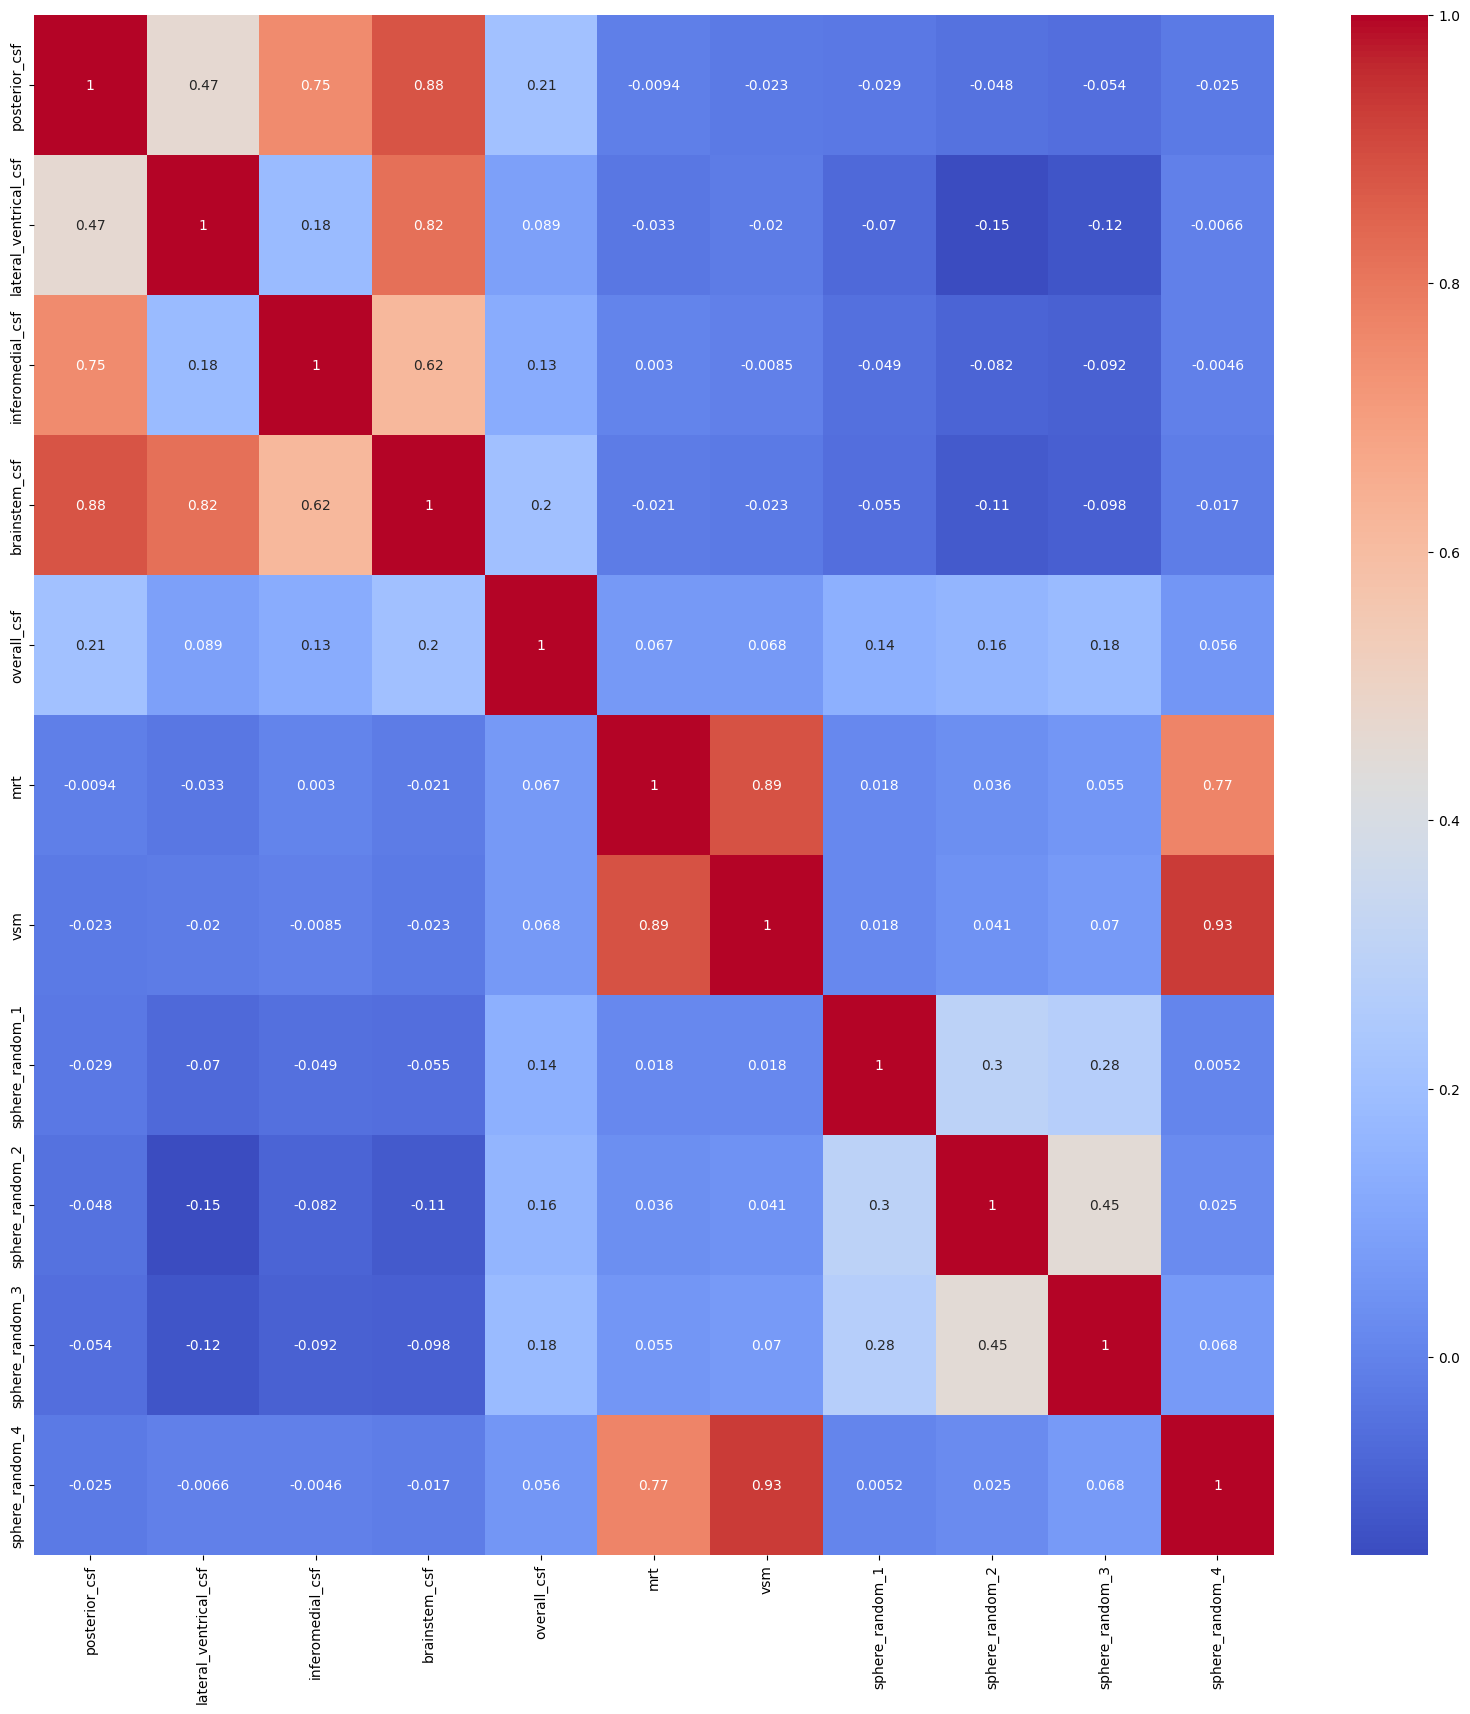

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20))
sns.heatmap(result_gsp1000_mf[1], xticklabels=result_gsp1000_mf[-1], yticklabels=result_gsp1000_mf[-1], cmap='coolwarm', annot=True)
plt.show()


**Now, make the same correlation matrix, but using Yeo1000**

In [19]:
cs_roi_yeo1000 = '/data/nimlab/connectome_npy/yeo1000_dil'
cs_brain_yeo1000 = '/data/nimlab/connectome_npy/yeo1000_dil'
masker_list = [] 
roi_connectome_type = 'volume'
brain_connectome_type = 'volume'
same_connectome = False
warning_flag = True


roi_list = {
    'posterior_csf':np.atleast_2d(NiftiMasker().transform('/PHShome/jt041/projects/connectome_differences/masks/posterior_csf_mask_2mm.nii.gz')),
    'lateral_ventrical_csf':np.atleast_2d(NiftiMasker().transform('/PHShome/jt041/projects/connectome_differences/masks/lateral_ventricular_csf_mask_2mm.nii.gz')),
    'inferomedial_csf':np.atleast_2d(NiftiMasker().transform('/PHShome/jt041/projects/connectome_differences/masks/inferomedial_csf_mask_2mm.nii.gz')),
    'brainstem_csf':np.atleast_2d(NiftiMasker().transform('/PHShome/jt041/projects/connectome_differences/masks/brainstem_csf_mask_2mm.nii.gz')),
    'overall_csf':np.atleast_2d(NiftiMasker().transform('/PHShome/jt041/projects/connectome_differences/masks/csf_mask_2mm.nii.gz')),
    'mrt':np.atleast_2d(NiftiMasker().transform('/PHShome/jt041/projects/connectome_differences/rois/MRT_bilateral.nii.gz')),
    'vsm':np.atleast_2d(NiftiMasker().transform('/PHShome/jt041/projects/connectome_differences/rois/VSM_bilateral.nii.gz')),
    'sphere_random_1':np.atleast_2d(NiftiMasker().transform('/PHShome/jt041/projects/connectome_differences/rois/sphere_-26_-62_-64.nii.gz')),
    'sphere_random_2':np.atleast_2d(NiftiMasker().transform('/PHShome/jt041/projects/connectome_differences/rois/sphere_-18_-72_-56.nii.gz')),
    'sphere_random_3':np.atleast_2d(NiftiMasker().transform('/PHShome/jt041/projects/connectome_differences/rois/sphere_-28_-78_-52.nii.gz')),
    'sphere_random_4':np.atleast_2d(NiftiMasker().transform('/PHShome/jt041/projects/connectome_differences/rois/sphere_-2_-46_-52.nii.gz')),
} 

subjects_yeo1000 = create_connectome_subjects(cs_roi_yeo1000, cs_brain_yeo1000, roi_list, masker_list, roi_connectome_type, brain_connectome_type, same_connectome, warning_flag)

result_yeo1000 = cs.calculate_roi_matrix(
    subjects=subjects_yeo1000,
    num_workers=4
)


/PHShome/jt041/joseph_env/lib/python3.12/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
100%|██████████| 1000/1000 [03:34<00:00,  4.66it/s]
/PHShome/jt041/joseph_env/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1048: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean


**Plot the Yeo1000 correlation matrix**

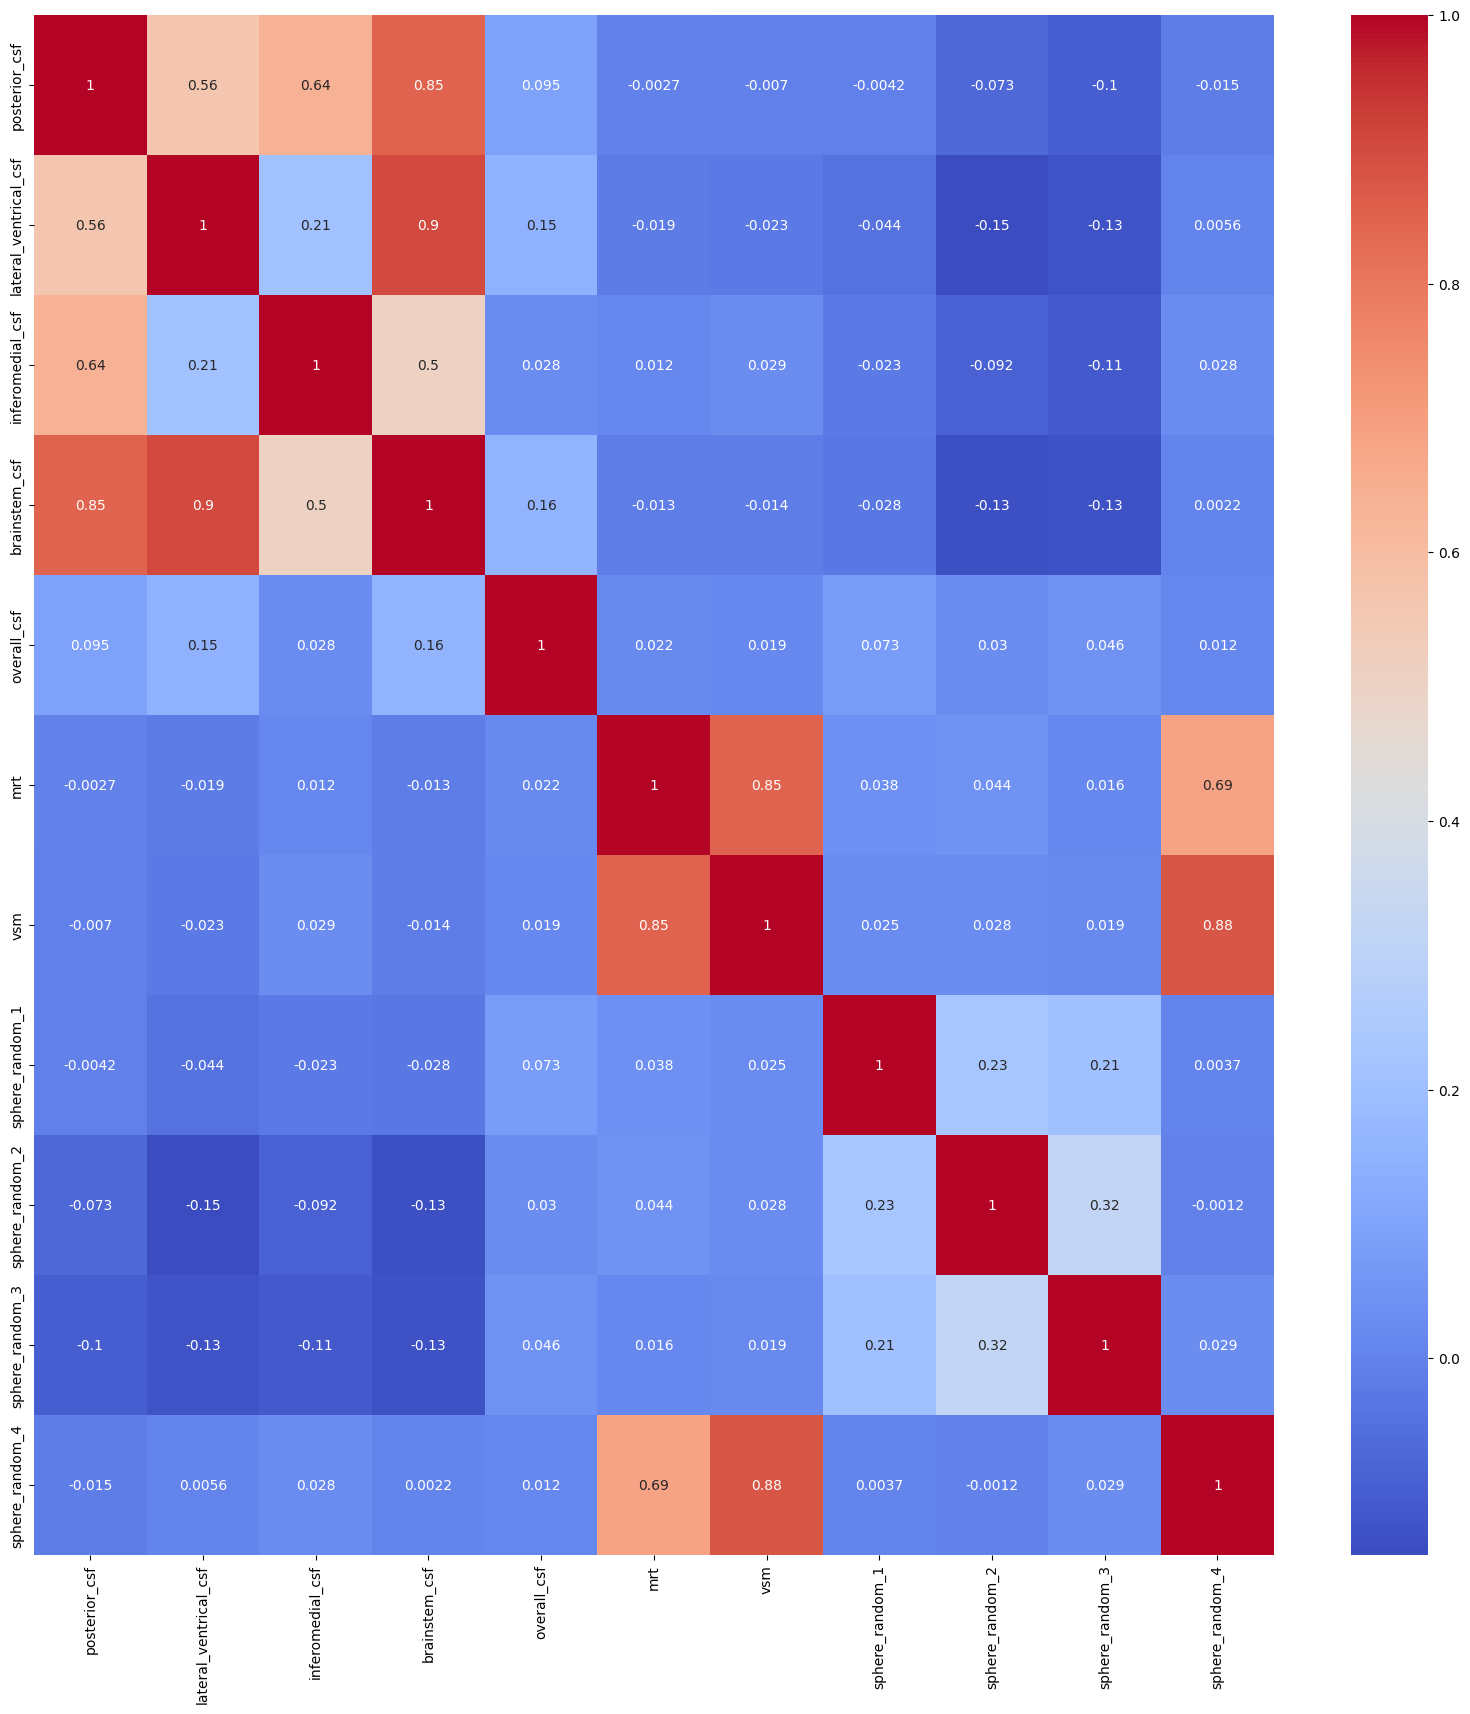

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20))
sns.heatmap(result_yeo1000[1], xticklabels=result_yeo1000[-1], yticklabels=result_yeo1000[-1], cmap='coolwarm', annot=True)
plt.show()

**Now, plot the difference matrix; higher values indicate correlations that were higher in GSP1000_MF, lower values indicate correlations that were higher in Yeo1000**

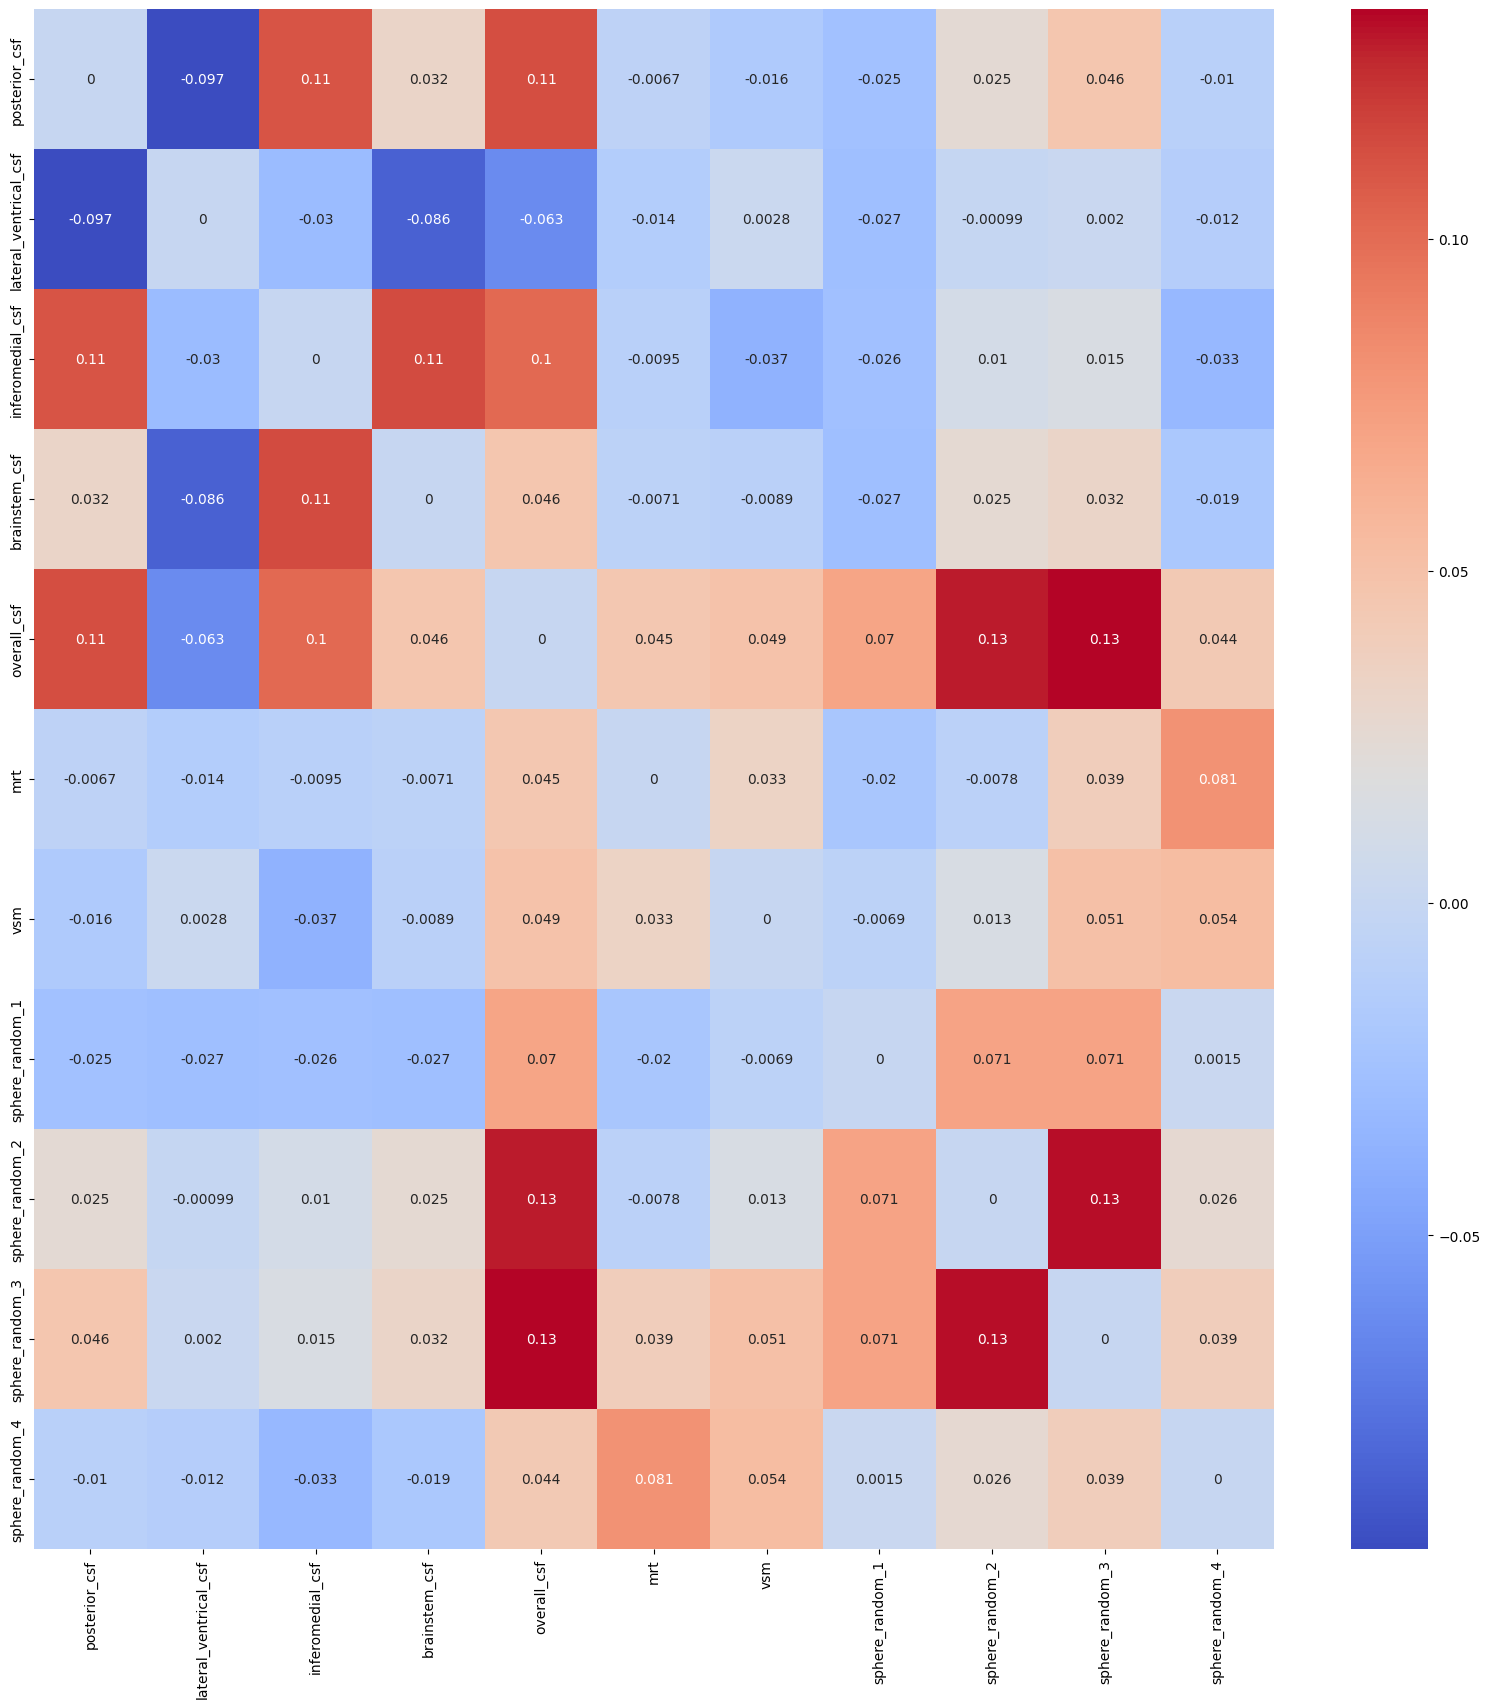

In [21]:
difference_matrix = result_gsp1000_mf[1] - result_yeo1000[1]

plt.figure(figsize=(20, 20))
sns.heatmap(difference_matrix, xticklabels=result_yeo1000[-1], yticklabels=result_yeo1000[-1], cmap='coolwarm', annot=True)
plt.show()


**It looks like the GSP1000_MF is a little more connected to CSF signals, especially the overall_csf signal, but its not very clear what's going on.**